In [142]:
%%capture
%run 'main.py'

# 1. O Dataset e o Projeto

## Descrição 
<p>Análise dos dados referentes as métricas do projeto X de Dívida Técnica da Ericson. The archival data was collected from 33 product customization tasks (PCs) of this studied project between 2013 and 2016.
</p>

## Dados
<ul>
    <li>Tabela de Métricas</li>
    <li>Tabela do site India</li>
    <li>Tabela do site Sweden</li>
    <li>Tabela do site Italy</li>
    <li>Tabela do site USA</li>
</ul>

### Importando bibliotecas extras (geração de gráficos e análises estatísticas)

In [143]:
# importando o pyplot
from matplotlib import pyplot
# importando o stats 
from scipy import stats

In [144]:
# 1. Tabela de Métricas
df_all_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 12 columns):
uniqueID              32 non-null object
ID                    32 non-null object
location              32 non-null object
maturity              32 non-null float64
totalDevelopers       32 non-null float64
complexityPoints      32 non-null float64
start                 32 non-null object
end                   32 non-null object
leadTime              32 non-null float64
technicalDebt         32 non-null float64
taskScaling           32 non-null float64
taskGlobalDistance    32 non-null float64
dtypes: float64(7), object(5)
memory usage: 4.5+ KB


## 1.1 Amostra de Dados

In [145]:
df_all_metrics.head(5)

,uniqueID,ID,location,maturity,totalDevelopers,complexityPoints,start,end,leadTime,technicalDebt,taskScaling,taskGlobalDistance
0,PC:14187,TURK-372,India,4.0,13.0,60.0,2014-08-11 00:00:00,2015-02-06 00:00:00,179.0,796.0,0.216667,1.250000
1,PC:15448,BHA-328,Virtual,4.0,25.0,170.0,2015-01-19 00:00:00,2015-06-05 00:00:00,137.0,2474.0,0.147059,6.244748
2,PC:13350,TELSTRA-038,India,4.0,7.0,35.0,2015-02-09 00:00:00,2015-04-02 00:00:00,52.0,202.0,0.200000,3.463991
3,PC:13708,TURK-362,India,4.0,2.0,15.0,2015-04-27 00:00:00,2015-06-05 00:00:00,39.0,0.0,0.133333,3.463991
4,PC:13756,IDEA-173,India,4.0,4.0,25.0,2015-04-27 00:00:00,2015-06-12 00:00:00,46.0,626.0,0.160000,3.463991


In [146]:
location = df_all_metrics.location.unique()

In [147]:
print("Countries evaluated in the case study: ")
for each in location:
    print(each)

Countries evaluated in the case study: 
India
Virtual
Italy
USA
Sweden


## 1.2 Estatísticas da Tabela de Métricas

In [148]:
df_all_metrics.describe().round(2)

,maturity,totalDevelopers,complexityPoints,leadTime,technicalDebt,taskScaling,taskGlobalDistance
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,3.00,6.31,78.28,77.03,1248.13,0.15,3.34
std,1.68,4.24,115.16,36.89,1468.19,0.11,1.46
min,0.00,2.00,10.00,18.00,0.00,0.01,0.00
25%,2.00,4.00,23.75,50.75,112.75,0.08,3.46
50%,4.00,6.00,42.50,67.00,703.00,0.12,3.46
75%,4.00,7.25,96.25,102.00,1686.50,0.20,3.46
max,4.00,25.00,600.00,179.00,5429.00,0.47,6.24


### Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [149]:
df_all_metrics.corr().round(4)

,maturity,totalDevelopers,complexityPoints,leadTime,technicalDebt,taskScaling,taskGlobalDistance
maturity,1.0000,0.3162,-0.2918,0.0119,-0.0476,0.5259,0.2134
totalDevelopers,0.3162,1.0000,0.2966,0.5913,0.3433,0.0765,0.2219
complexityPoints,-0.2918,0.2966,1.0000,0.3300,0.6088,-0.4695,-0.2742
leadTime,0.0119,0.5913,0.3300,1.0000,0.4088,-0.2425,-0.1703
technicalDebt,-0.0476,0.3433,0.6088,0.4088,1.0000,-0.4190,-0.0258
taskScaling,0.5259,0.0765,-0.4695,-0.2425,-0.4190,1.0000,0.2017
taskGlobalDistance,0.2134,0.2219,-0.2742,-0.1703,-0.0258,0.2017,1.0000


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
The most common correlation coefficient is the Pearson correlation, that uses p or r, measuring the degree of correlation, which is 
sensitive only to a linear relationship between two variables, however, it was chosen Spearmans rank correlation that have been developed 
to be more robust than Pearsons, that is, more sensitive to nonlinear relationships, because TD does not follow a Normal Distribution.    
   </p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    Pela matriz de correlação, considerando a variável <b>technicalDebt</b>, pode-se perceber que as features <b>totalDevelopers</b>, <b>complexityPoints</b>, <b>leadTime</b> e <b>taskScaling</b> podem ter um bom nível de correlação
</p>

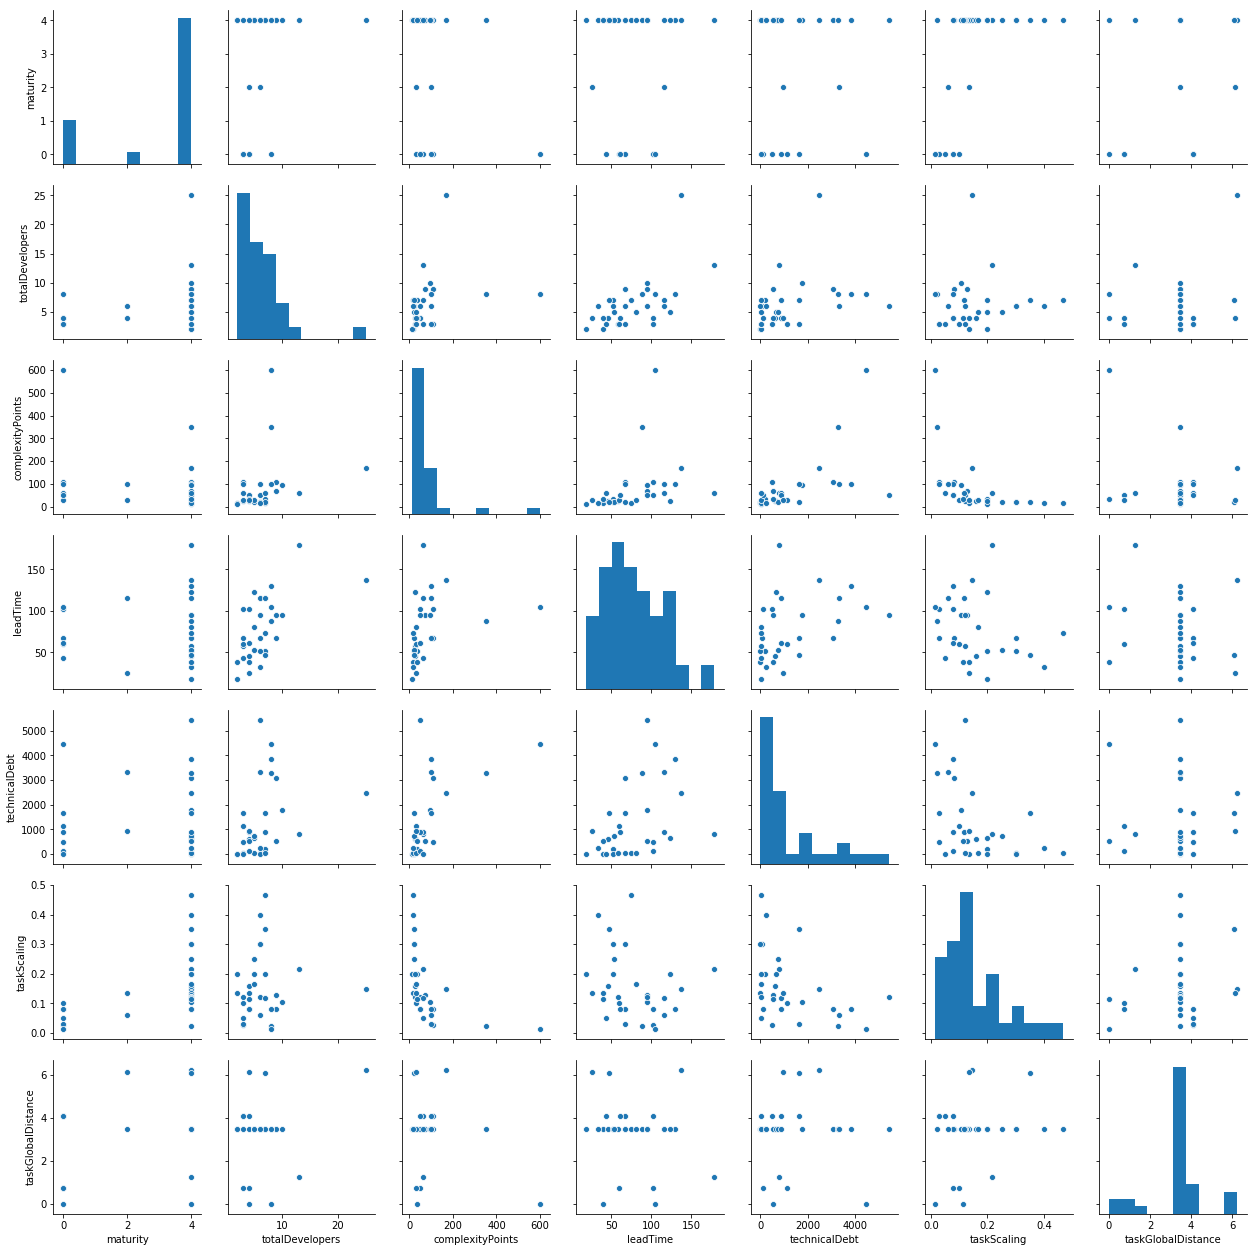

In [150]:
sns.pairplot(df_all_metrics)
plt.show()

### Plotando a variável *dependente* (y)
(pontos de Dívida Técnica ao longo da evolução (em dias) do software)

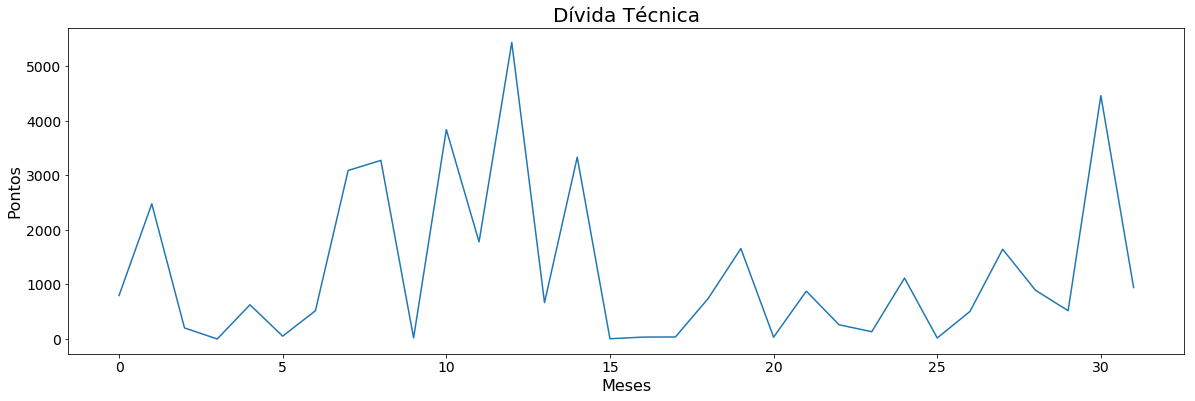

In [151]:
fig, ax = pyplot.subplots(figsize=(20,6))

ax.set_title('Dívida Técnica', fontsize=20)
ax.set_ylabel('Pontos', fontsize=16)
ax.set_xlabel('Meses', fontsize=16)
ax = df_all_metrics['technicalDebt'].plot(fontsize=14)

In [152]:
def show_box_plot(feature):
  sns.boxplot(data=df_all_metrics[feature], orient='h')

def my_describe(feature):
  my_data = df_all_metrics[feature]
  print("Estatísticas dos dados de " + feature)
  print(my_data.describe().round(2))

def my_outliers(feature, limite):
  my_data = df_all_metrics[feature]
  print("Outliers dos dados de " + feature)
  print(my_data[my_data > limite])

In [153]:
def show_distribution(feature):
  ax = sns.distplot(df_all_metrics[feature])
  ax.figure.set_size_inches(12, 6)
  ax.set_title('Distrubuição de Frequências', fontsize=20)
  ax.set_ylabel(feature, fontsize=16)
  ax

### Box plot da variável *dependente* (y)

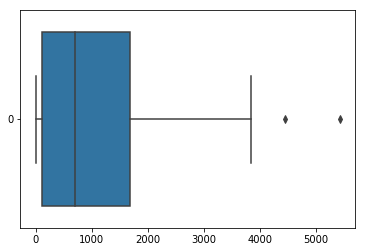

In [154]:
show_box_plot('technicalDebt')

In [155]:
my_describe('technicalDebt')

Estatísticas dos dados de technicalDebt
count      32.00
mean     1248.13
std      1468.19
min         0.00
25%       112.75
50%       703.00
75%      1686.50
max      5429.00
Name: technicalDebt, dtype: float64


In [156]:
my_outliers('technicalDebt', 4000)

Outliers dos dados de technicalDebt
12    5429.0
30    4455.0
Name: technicalDebt, dtype: float64


### Box plot da feature1 (x1)

In [157]:
feature1 = 'leadTime'

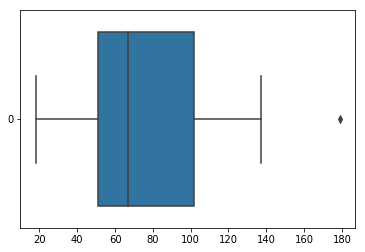

In [158]:
show_box_plot(feature1)

In [159]:
my_describe(feature1)

Estatísticas dos dados de leadTime
count     32.00
mean      77.03
std       36.89
min       18.00
25%       50.75
50%       67.00
75%      102.00
max      179.00
Name: leadTime, dtype: float64


In [160]:
my_outliers(feature1, 160)

Outliers dos dados de leadTime
0    179.0
Name: leadTime, dtype: float64


### Box plot da feature 2 (x2)

In [161]:
feature2 = 'complexityPoints'

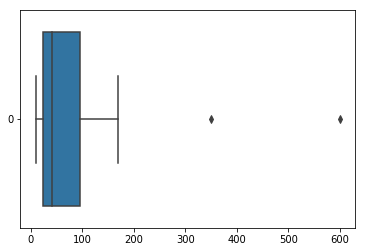

In [162]:
show_box_plot(feature2)

In [163]:
my_describe(feature2)

Estatísticas dos dados de complexityPoints
count     32.00
mean      78.28
std      115.16
min       10.00
25%       23.75
50%       42.50
75%       96.25
max      600.00
Name: complexityPoints, dtype: float64


In [164]:
my_outliers(feature2, 300)

Outliers dos dados de complexityPoints
8     350.0
30    600.0
Name: complexityPoints, dtype: float64


### Box plot da feature 3 (x3)

In [165]:
feature3 = 'maturity'

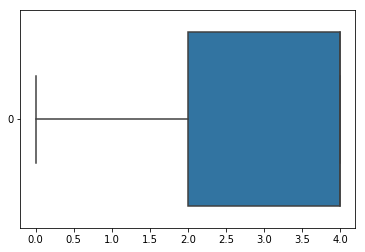

In [166]:
show_box_plot(feature3)

In [167]:
my_describe(feature3)

Estatísticas dos dados de maturity
count    32.00
mean      3.00
std       1.68
min       0.00
25%       2.00
50%       4.00
75%       4.00
max       4.00
Name: maturity, dtype: float64


### Box plot da feature 4 (x4)

In [168]:
feature4 = 'taskGlobalDistance'

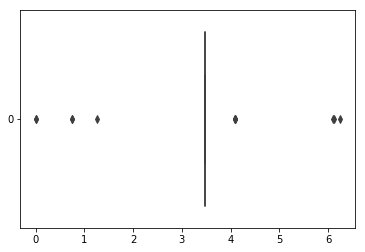

In [169]:
show_box_plot(feature4)

In [170]:
my_describe(feature4)

Estatísticas dos dados de taskGlobalDistance
count    32.00
mean      3.34
std       1.46
min       0.00
25%       3.46
50%       3.46
75%       3.46
max       6.24
Name: taskGlobalDistance, dtype: float64


### Box plot da feature 5 (x5)

In [171]:
feature5 = 'taskScaling'

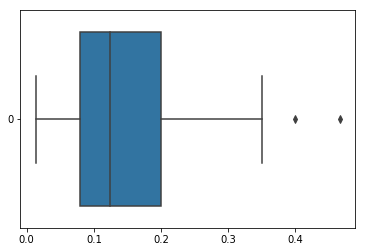

In [172]:
show_box_plot(feature5)

In [173]:
my_describe(feature5)

Estatísticas dos dados de taskScaling
count    32.00
mean      0.15
std       0.11
min       0.01
25%       0.08
50%       0.12
75%       0.20
max       0.47
Name: taskScaling, dtype: float64


### Box plot da feature 6 (x6)

In [174]:
feature6 = 'totalDevelopers'

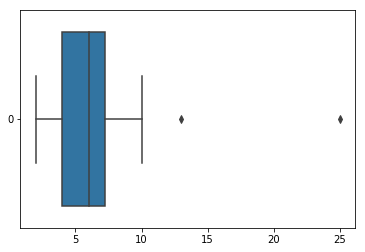

In [175]:
show_box_plot(feature6)

In [176]:
my_describe(feature6)

Estatísticas dos dados de totalDevelopers
count    32.00
mean      6.31
std       4.24
min       2.00
25%       4.00
50%       6.00
75%       7.25
max      25.00
Name: totalDevelopers, dtype: float64


In [177]:
my_outliers(feature6, 10)

Outliers dos dados de totalDevelopers
0    13.0
1    25.0
Name: totalDevelopers, dtype: float64


### Distribuição de frequências da variável *dependente* (y)

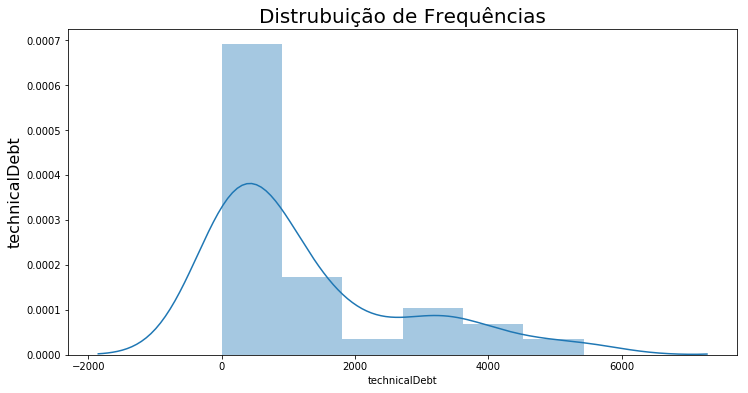

In [178]:
show_distribution('technicalDebt')

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    Pela Distribuição de Frequências da Dívida Técnica, pode-se perceber que ela não segue uma distribuição normal
</p>

### Distribuição de frequências da feature *LeadTime* (x1)

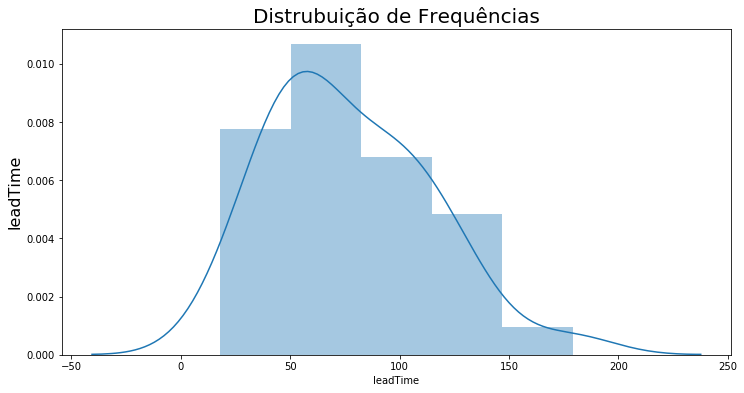

In [179]:
show_distribution('leadTime')

### Distribuição de frequências da feature *ComplexityPoints* (x2)

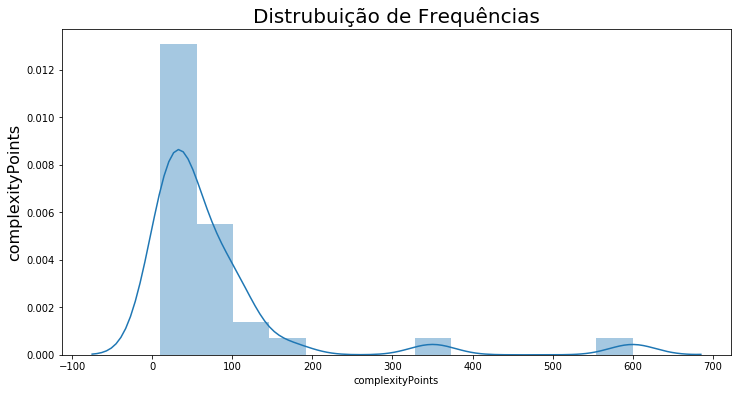

In [180]:
show_distribution('complexityPoints')

### Distribuição de frequências da feature *Maturity* (x3)

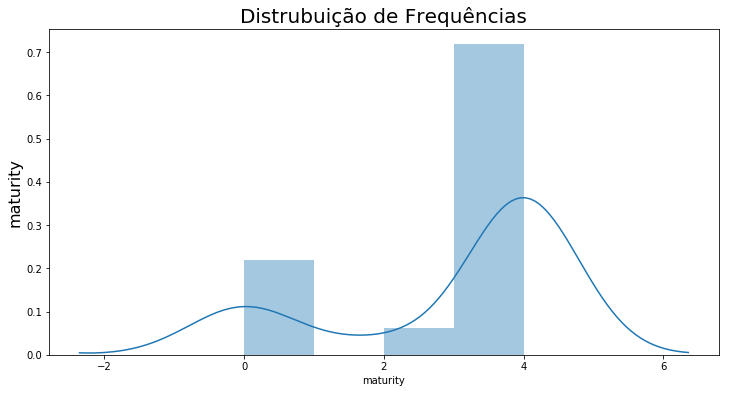

In [181]:
show_distribution('maturity')

### Distribuição de frequências da feature *TaskGlobalDistance* (x4)

In [182]:
###?

### Distribuição de frequências da feature *TotalDevelopers* (x5)

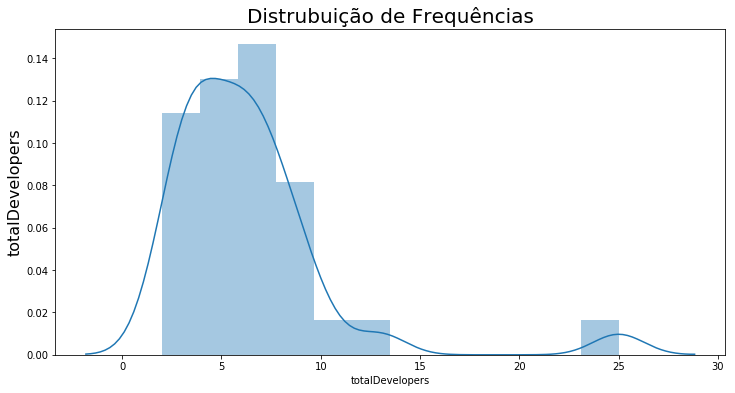

In [183]:
show_distribution('totalDevelopers')

### Boxplot Technical Debt x Location

Text(0.5,1,'Boxplot Distribuition Technical Debt x Location')

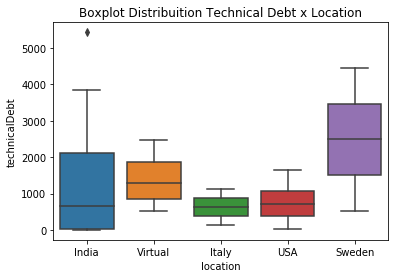

In [184]:
sns.boxplot(x='location', y='technicalDebt', data=df_all_metrics).set_title('Boxplot Distribuition Technical Debt x Location')

## 1.3 Analisando as correlações entre as features (xi) e a variável dependente (y)

### 1.3.1 Gráfico de Correlação entre LeadTime (x1) e Technical Debt (y)

In [185]:
arrayLeadTime = df_all_metrics.leadTime.values
arrayTechnicalDebt = df_all_metrics.technicalDebt.values

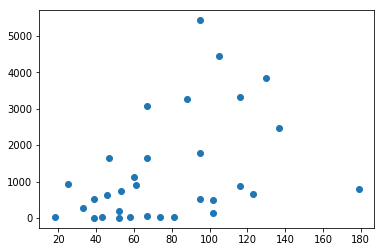

In [186]:
# plot
pyplot.scatter(arrayLeadTime, arrayTechnicalDebt)
pyplot.show()

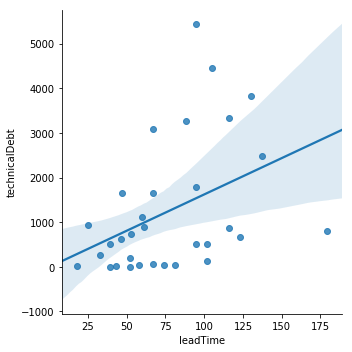

In [187]:
sns.lmplot(x='leadTime', y='technicalDebt', data=df_all_metrics)

In [188]:
def checkSpearmansCorrelations(coef,p, alfa):
    print('Spearmans correlation coefficient: %.3f' % coef)
    # interpret the significance
    if p > alfa:
	    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
    else:
	    print('Samples are correlated (reject H0) p=%.3f' % p)

### 1.3.1.1 Calculate spearman's correlation (LeadTime x TD)

In [189]:
stats.spearmanr(arrayLeadTime, arrayTechnicalDebt)

SpearmanrResult(correlation=0.48587185407612227, pvalue=0.004814195878751078)

In [190]:
type(stats.spearmanr(arrayLeadTime, arrayTechnicalDebt))

scipy.stats.stats.SpearmanrResult

In [191]:
# calculate spearman's correlation
coefLeadTime, pLeadTime = stats.spearmanr(arrayLeadTime, arrayTechnicalDebt)

In [192]:
alfa = 0.05

In [193]:
checkSpearmansCorrelations(coefLeadTime, pLeadTime, alfa)

Spearmans correlation coefficient: 0.486
Samples are correlated (reject H0) p=0.005


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    Pela análise do coeficiente de Spearman, pode-se perceber que <u>LeadTime</u> e <u>TD</u> <b>são</b> <u>correlacionados</u>. Com isso, existe uma tendência de que na medida que o LeadTime aumenta a Dívida Técnica tende a aumentar
</p>

### 1.3.2 Gráfico de Correlação entre ComplexityPoint (x2) e Technical Debt (y)

In [194]:
arrayComplexityPoints = df_all_metrics.complexityPoints.values

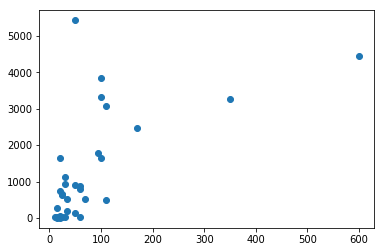

In [195]:
# plot
pyplot.scatter(arrayComplexityPoints, arrayTechnicalDebt)
pyplot.show()

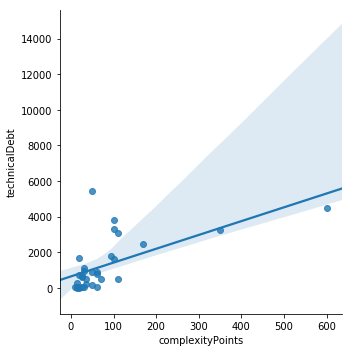

In [196]:
sns.lmplot(x='complexityPoints', y='technicalDebt', data=df_all_metrics)

### 1.3.2.1 Calculate spearman's correlation (ComplexityPoints x TD)

In [197]:
# calculate spearman's correlation
coefComplexityPoints, pComplexityPoints = stats.spearmanr(arrayComplexityPoints, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefComplexityPoints, pComplexityPoints, alfa)

Spearmans correlation coefficient: 0.650
Samples are correlated (reject H0) p=0.000


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        Pela análise do coeficiente de Spearman, pode-se perceber que <u>ComplexityPoints</u> e <u>TD</u> <b>são</b> <u>correlacionados</u>. Com isso, existe uma tendência de que na medida que o ComplexityPoints aumenta a Dívida Técnica tende a aumentar.
</p>

### 1.3.3 Gráfico de Correlação entre Maturity (x3) e Technical Debt (y)

In [198]:
arrayMaturity = df_all_metrics.maturity.values

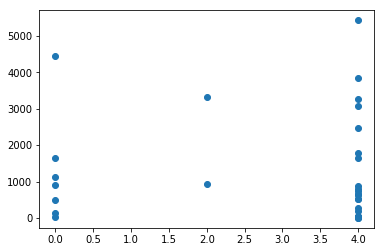

In [199]:
# plot
pyplot.scatter(arrayMaturity, arrayTechnicalDebt)
pyplot.show()

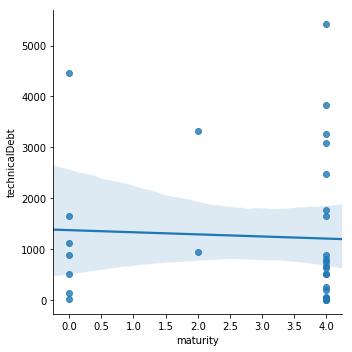

In [200]:
sns.lmplot(x='maturity', y='technicalDebt', data=df_all_metrics)

### 1.3.3.1 Calculate spearman's correlation (Maturity x TD)

In [201]:
# calculate spearman's correlation
coefMaturity, pMaturity = stats.spearmanr(arrayMaturity, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefMaturity, pMaturity, alfa)

Spearmans correlation coefficient: -0.135
Samples are uncorrelated (fail to reject H0) p=0.462


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        Pela análise do coeficiente de Spearman, pode-se perceber que <u>Maturity</u> e <u>TD</u> <b>NÃO são</b> <u>correlacionados</u>.
</p>

### 1.3.4 Gráfico de Correlação entre TaskGlobalDistance (x4) e Technical Debt (y)

In [202]:
arrayTaskGlobalDistance = df_all_metrics.taskGlobalDistance.values

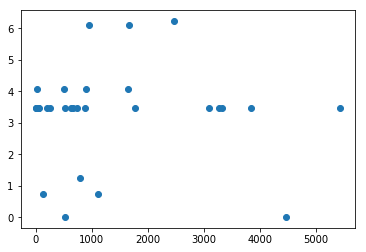

In [203]:
# plot
pyplot.scatter(arrayTechnicalDebt, arrayTaskGlobalDistance)
pyplot.show()

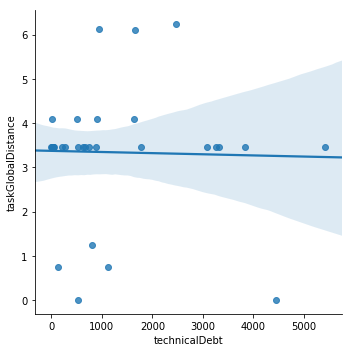

In [204]:
sns.lmplot(x='technicalDebt', y='taskGlobalDistance', data=df_all_metrics)

### 1.3.4.1 Calculate spearman's correlation (TaskGlobalDistance x TD)

In [205]:
# calculate spearman's correlation
coefTaskGlobalDistance, pTaskGlobalDistance = stats.spearmanr(arrayTaskGlobalDistance, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefTaskGlobalDistance, pTaskGlobalDistance, alfa)

Spearmans correlation coefficient: 0.034
Samples are uncorrelated (fail to reject H0) p=0.855


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        Pela análise do coeficiente de Spearman, pode-se perceber que <u>TaskGlobalDistance</u> e <u>TD</u> <b>NÃO são</b> <u>correlacionados</u>.
</p>

### 1.3.5 Gráfico de Correlação entre totalDevelopers (x5) e Technical Debt (y)

In [206]:
arrayTotalDevelopers = df_all_metrics.totalDevelopers.values

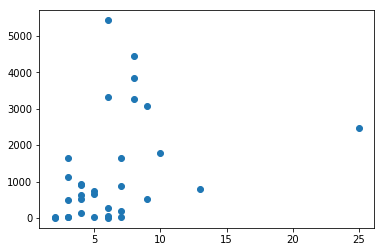

In [207]:
# plot
pyplot.scatter(arrayTotalDevelopers, arrayTechnicalDebt)
pyplot.show()


### 1.3.5.1 Calculate spearman's correlation (TotalDevelopers x TD)

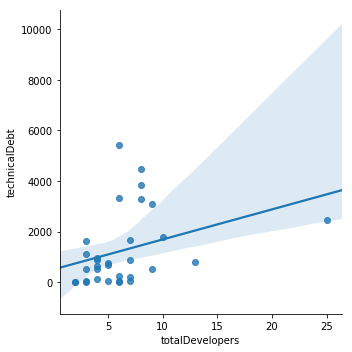

In [208]:
sns.lmplot(x='totalDevelopers', y='technicalDebt', data=df_all_metrics)

In [209]:
# calculate spearman's correlation
coefTotalDevelopers, pTotalDevelopers = stats.spearmanr(arrayTotalDevelopers, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefTotalDevelopers, pTotalDevelopers, alfa)

Spearmans correlation coefficient: 0.505
Samples are correlated (reject H0) p=0.003


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        Pela análise do coeficiente de Spearman, pode-se perceber que <u>TotalDevelopers</u> e <u>TD</u> <b>são</b> <u>correlacionados</u>. Com isso, existe uma tendência de que na medida que o ComplexityPoints aumenta a Dívida Técnica tende a aumentar.
</p>

### 1.3.6 Gráfico de Correlação entre taskScaling e Technical Debt

In [210]:
arrayTaskScaling = df_all_metrics.taskScaling.values

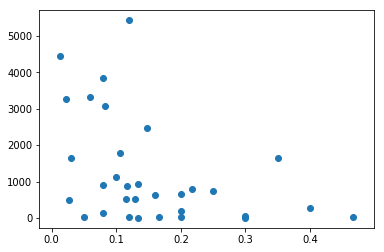

In [211]:
# plot
pyplot.scatter(arrayTaskScaling, arrayTechnicalDebt)
pyplot.show()

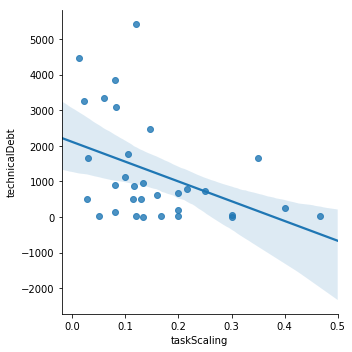

In [212]:
sns.lmplot(x='taskScaling', y='technicalDebt', data=df_all_metrics)

### 1.3.6.1 Calculate spearman's correlation (taskScaling x TD)

In [213]:
coefTaskScaling, pTaskScaling = stats.spearmanr(arrayTaskScaling, arrayTechnicalDebt)
alfa = 0.05
checkSpearmansCorrelations(coefTaskScaling, pTaskScaling, alfa)

Spearmans correlation coefficient: -0.439
Samples are correlated (reject H0) p=0.012


<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>
        Pela análise do coeficiente de Spearman, pode-se perceber que <u>TaskScaling</u> e <u>TD</u> <b>são</b> <u>correlacionados</u>. 
</p>

## 1.4 Resumo da análise de correlação (Spearman's correlation coefficient)

|  Caracterítica     | Dívida Técnica  | Correlacionado |  
|--------------------|-----------------|----------------|
| LeadTime           | TD              | SIM            |
| ComplexityPoints   | TD              | SIM            |
| TotalDevelopers    | TD              | SIM            |
| TaskScaling        | TD              | SIM            | 
| Maturity           | TD              | Não            | 
| TaskGlobalDistance | TD              | Não            |

In [214]:
from tabulate import tabulate

In [215]:
def showCalcPSpearman(p, alfa):
    if p > alfa:
        return 'NÃO'
    else:
        return 'SIM'

In [216]:
LeadTimeRow = ['LeadTime', 'TD', coefLeadTime.round(3), pLeadTime.round(3), 
               showCalcPSpearman(pLeadTime, 0.05)]

ComplexityPointsRow = ['ComplexityPoints', 'TD', coefComplexityPoints.round(3), pComplexityPoints.round(3),
                       showCalcPSpearman(pComplexityPoints, 0.05)]

TotalDevelopersRow = ['TotalDevelopers', 'TD', coefTotalDevelopers.round(3), pTotalDevelopers.round(3),
                      showCalcPSpearman(pTotalDevelopers, 0.05)]

TaskScalingRow = ['TaskScaling', 'TD', coefTaskScaling.round(3), pTaskScaling.round(3), 
                  showCalcPSpearman(pTaskScaling, 0.05)]

MaturityRow = ['Maturity', 'TD', coefMaturity.round(3), pMaturity.round(3), 
               showCalcPSpearman(pMaturity, 0.05)]

TaskGlobalDistanceRow = ['TaskGlobalDistance', 'TD', coefTaskGlobalDistance.round(3), pTaskGlobalDistance.round(3),
                         showCalcPSpearman(pTaskGlobalDistance, 0.05)]

analysisHeaders = ['Característica', 'Dívida Técnica', 'Spearmans Coef', 'p', 'Correlacionado']

print(tabulate([LeadTimeRow, ComplexityPointsRow, TotalDevelopersRow, 
                TaskScalingRow, MaturityRow, TaskGlobalDistanceRow],
               headers=analysisHeaders))

Característica      Dívida Técnica      Spearmans Coef      p  Correlacionado
------------------  ----------------  ----------------  -----  ----------------
LeadTime            TD                           0.486  0.005  SIM
ComplexityPoints    TD                           0.65   0      SIM
TotalDevelopers     TD                           0.505  0.003  SIM
TaskScaling         TD                          -0.439  0.012  SIM
Maturity            TD                          -0.135  0.462  NÃO
TaskGlobalDistance  TD                           0.034  0.855  NÃO


## 1.5 Normalização dos dados

In [217]:
df_my_all_metrics = df_all_metrics[['technicalDebt', 'leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling', 'maturity', 'taskGlobalDistance']]
df_my_all_metrics.head(3)

,technicalDebt,leadTime,complexityPoints,totalDevelopers,taskScaling,maturity,taskGlobalDistance
0,796.0,179.0,60.0,13.0,0.216667,4.0,1.250000
1,2474.0,137.0,170.0,25.0,0.147059,4.0,6.244748
2,202.0,52.0,35.0,7.0,0.200000,4.0,3.463991


In [218]:
my_dict = {0:'technicalDebt', 1:'leadTime', 2:'complexityPoints', 
           3:'totalDevelopers',4:'taskScaling', 5:'maturity', 6:'taskGlobalDistance'}
my_dict

{0: 'technicalDebt',
 1: 'leadTime',
 2: 'complexityPoints',
 3: 'totalDevelopers',
 4: 'taskScaling',
 5: 'maturity',
 6: 'taskGlobalDistance'}

In [219]:
import pandas as pd
from sklearn import preprocessing

In [220]:
x = df_my_all_metrics.values #returns a numpy array

In [221]:
min_max_scaler = preprocessing.MinMaxScaler()

In [222]:
x_scaled = min_max_scaler.fit_transform(x)

In [223]:
df_my_all_metrics_normalized = pd.DataFrame(x_scaled)

In [224]:
df_my_all_metrics_normalized.head(3)

,0,1,2,3,4,5,6
0,0.146620,1.00000,0.084746,0.478261,0.448529,1.0,0.200168
1,0.455701,0.73913,0.271186,1.000000,0.294983,1.0,1.000000
2,0.037208,0.21118,0.042373,0.217391,0.411765,1.0,0.554705


In [225]:
df_my_all_metrics_normalized.rename(columns=my_dict, inplace=True)

In [226]:
df_my_all_metrics_normalized.head(5)

,technicalDebt,leadTime,complexityPoints,totalDevelopers,taskScaling,maturity,taskGlobalDistance
0,0.146620,1.000000,0.084746,0.478261,0.448529,1.0,0.200168
1,0.455701,0.739130,0.271186,1.000000,0.294983,1.0,1.000000
2,0.037208,0.211180,0.042373,0.217391,0.411765,1.0,0.554705
3,0.000000,0.130435,0.008475,0.000000,0.264706,1.0,0.554705
4,0.115307,0.173913,0.025424,0.086957,0.323529,1.0,0.554705


### Estatísticas da Tabela de Métricas Normalizada

In [227]:
df_my_all_metrics_normalized.describe().round(3)

,technicalDebt,leadTime,complexityPoints,totalDevelopers,taskScaling,maturity,taskGlobalDistance
count,32.000,32.000,32.000,32.000,32.000,32.000,32.000
mean,0.230,0.367,0.116,0.188,0.312,0.750,0.535
std,0.270,0.229,0.195,0.184,0.244,0.421,0.234
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.021,0.203,0.023,0.087,0.147,0.500,0.555
50%,0.129,0.304,0.055,0.174,0.245,1.000,0.555
75%,0.311,0.522,0.146,0.228,0.412,1.000,0.555
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [228]:
df_my_all_metrics_normalized.corr().round(4)

,technicalDebt,leadTime,complexityPoints,totalDevelopers,taskScaling,maturity,taskGlobalDistance
technicalDebt,1.0000,0.4088,0.6088,0.3433,-0.4190,-0.0476,-0.0258
leadTime,0.4088,1.0000,0.3300,0.5913,-0.2425,0.0119,-0.1703
complexityPoints,0.6088,0.3300,1.0000,0.2966,-0.4695,-0.2918,-0.2742
totalDevelopers,0.3433,0.5913,0.2966,1.0000,0.0765,0.3162,0.2219
taskScaling,-0.4190,-0.2425,-0.4695,0.0765,1.0000,0.5259,0.2017
maturity,-0.0476,0.0119,-0.2918,0.3162,0.5259,1.0000,0.2134
taskGlobalDistance,-0.0258,-0.1703,-0.2742,0.2219,0.2017,0.2134,1.0000


In [229]:
def show_my_scatter(feature):
  # plot
  pyplot.scatter(df_my_all_metrics_normalized[feature].values, df_my_all_metrics_normalized.technicalDebt.values)
  pyplot.show()

def show_my_lmplot(feature):
  sns.lmplot(x=feature, y='technicalDebt', data=df_my_all_metrics_normalized)

In [230]:
def calculate_spearman(feature):
  # calculate spearman's correlation
  coef, p = stats.spearmanr(df_my_all_metrics_normalized[feature].values,  df_my_all_metrics_normalized.technicalDebt.values)
  alfa = 0.05
  checkSpearmansCorrelations(coef, p, alfa)
  return coef.round(4), p.round(4)

### 1.5.1 Gráfico de Correlação entre LeadTime (x1) e Technical Debt (y)

Spearmans correlation coefficient: 0.486
Samples are correlated (reject H0) p=0.005


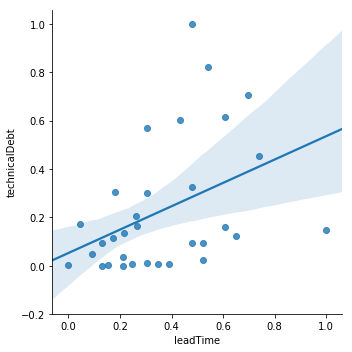

In [231]:
feature1 = my_dict[1]
show_my_lmplot(feature1)
coefLeadTimeNormalized, pLeadTimeNormalized = calculate_spearman(feature1)

### 1.5.2 Gráfico de Correlação entre complexyPoint (x2) e Technical Debt (y)

Spearmans correlation coefficient: 0.650
Samples are correlated (reject H0) p=0.000


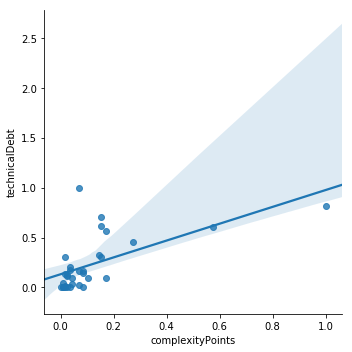

In [232]:
feature2 = my_dict[2]
show_my_lmplot(feature2)
coefComplexityPointsNormalized, pComplexityPointsNormalized = calculate_spearman(feature2)

### 1.5.3 Gráfico de Correlação entre totalDevlopers (x3) e Technical Debt (y)

Spearmans correlation coefficient: 0.505
Samples are correlated (reject H0) p=0.003


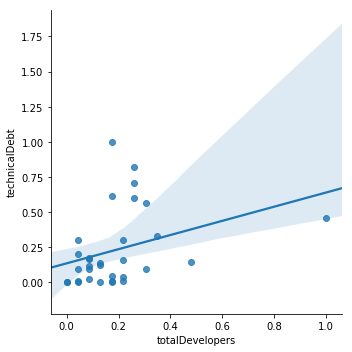

In [233]:
feature3 = my_dict[3]
show_my_lmplot(feature3)
coefTotalDevelopersNormalized, pTotalDevelopersNormalized = calculate_spearman(feature3)

### 1.5.4 Gráfico de Correlação entre taskScaling (x4) e Technical Debt (y)

Spearmans correlation coefficient: -0.439
Samples are correlated (reject H0) p=0.012


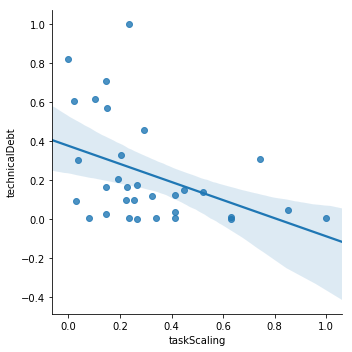

In [234]:
feature4 = my_dict[4]
show_my_lmplot(feature4)
coefTaskScalingNormalized, pTaskScalingNormalized = calculate_spearman(feature4)

### 1.5.5 Gráfico de Correlação entre maturity (x5) e Technical Debt (y)

Spearmans correlation coefficient: -0.135
Samples are uncorrelated (fail to reject H0) p=0.462


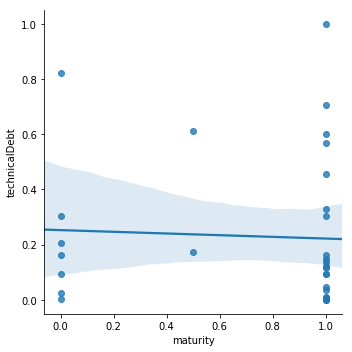

In [235]:
feature5 = my_dict[5]
show_my_lmplot(feature5)
coefMaturityNormalized, pMaturityNormalized = calculate_spearman(feature5)

### 1.5.6 Gráfico de Correlação entre taskGlobalDistance (x6) e Technical Debt (y)

Spearmans correlation coefficient: 0.034
Samples are uncorrelated (fail to reject H0) p=0.855


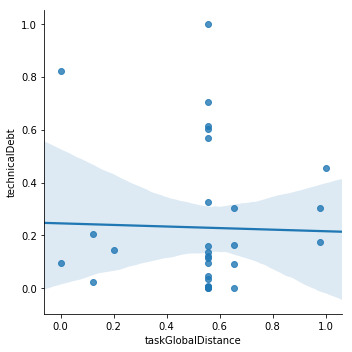

In [236]:
feature6 = my_dict[6]
show_my_lmplot(feature6)
coefTaskGlobalDistanceNormalized, pTaskGlobalDistanceNormalized = calculate_spearman(feature6)

In [237]:
from tabulate import tabulate
def showCalcPSpearman(p, alfa):
    if p > alfa:
        return 'NÃO'
    else:
        return 'SIM'

In [238]:
LeadTimeRow = ['LeadTime', 'TD', coefLeadTimeNormalized.round(3), pLeadTimeNormalized.round(3), 
               showCalcPSpearman(pLeadTimeNormalized, 0.05)]

ComplexityPointsRow = ['ComplexityPoints', 'TD', coefComplexityPointsNormalized.round(3), 
                       pComplexityPointsNormalized.round(3),
                       showCalcPSpearman(pComplexityPointsNormalized, 0.05)]

TotalDevelopersRow = ['TotalDevelopers', 'TD', coefTotalDevelopersNormalized, pTotalDevelopersNormalized.round(3),
                      showCalcPSpearman(pTotalDevelopersNormalized, 0.05)]

TaskScalingRow = ['TaskScaling', 'TD', coefTaskScalingNormalized.round(3), pTaskScalingNormalized.round(3), 
                  showCalcPSpearman(pTaskScalingNormalized, 0.05)]

MaturityRow = ['Maturity', 'TD', coefMaturityNormalized.round(3), pMaturityNormalized.round(3), 
               showCalcPSpearman(pMaturityNormalized, 0.05)]

TaskGlobalDistanceRow = ['TaskGlobalDistance', 'TD', coefTaskGlobalDistanceNormalized.round(3), 
                         pTaskGlobalDistanceNormalized.round(3),
                         showCalcPSpearman(pTaskGlobalDistanceNormalized, 0.05)]

analysisHeaders = ['Característica', 'Dívida Técnica', 'Spearmans Coef', 'p', 'Correlacionado']

print(tabulate([LeadTimeRow, ComplexityPointsRow, TotalDevelopersRow, 
                TaskScalingRow, MaturityRow, TaskGlobalDistanceRow],
               headers=analysisHeaders))

Característica      Dívida Técnica      Spearmans Coef      p  Correlacionado
------------------  ----------------  ----------------  -----  ----------------
LeadTime            TD                           0.486  0.005  SIM
ComplexityPoints    TD                           0.65   0      SIM
TotalDevelopers     TD                           0.505  0.003  SIM
TaskScaling         TD                          -0.439  0.012  SIM
Maturity            TD                          -0.135  0.462  NÃO
TaskGlobalDistance  TD                           0.034  0.855  NÃO


In [239]:
df_my_all_metrics_normalized.columns

Index(['technicalDebt', 'leadTime', 'complexityPoints', 'totalDevelopers',
       'taskScaling', 'maturity', 'taskGlobalDistance'],
      dtype='object')

In [240]:
my_dict

{0: 'technicalDebt',
 1: 'leadTime',
 2: 'complexityPoints',
 3: 'totalDevelopers',
 4: 'taskScaling',
 5: 'maturity',
 6: 'taskGlobalDistance'}

### 1.6 Wilcoxon singed-rank test

In [241]:
# Wilcoxon signed-rank test
# The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. 
# In particular, it tests whether the distribution of the differences x - y is symmetric about zero. 
# It is a non-parametric version of the paired T-test.

from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon

In [242]:
def checkWilcoxonSingedRank(data1, data2, alpha=0.05):
  stat, p = wilcoxon(data1, data2)
  print('Statistics=%.3f, p=%.3f' % (stat, p))

  # interpret
  if p > alpha:
    print('Same distribution (fail to reject H0)')
  else:
    print('Different distribution (reject H0)')
  return stat.round(3), p.round(3)

In [243]:
for i in range(1,5):
  print(my_dict[i])
  print(checkWilcoxonSingedRank(df_my_all_metrics_normalized[my_dict[i]].values, df_my_all_metrics_normalized.technicalDebt.values))
  print("---")  


leadTime
Statistics=119.000, p=0.007
Different distribution (reject H0)
(119.0, 0.007)
---
complexityPoints
Statistics=114.000, p=0.005
Different distribution (reject H0)
(114.0, 0.005)
---
totalDevelopers
Statistics=229.000, p=0.710
Same distribution (fail to reject H0)
(229.0, 0.71)
---
taskScaling
Statistics=197.000, p=0.210
Same distribution (fail to reject H0)
(197.0, 0.21)
---


### 1.7 Testing independence (durbin_watson)

In [244]:
from statsmodels.regression.linear_model import OLS
import numpy as np
from statsmodels.stats.stattools import durbin_watson

In [245]:
def dw(data):
    ols_res = OLS(data, np.ones(len(data))).fit()
    return durbin_watson(ols_res.resid)

In [246]:
print("dw of range=%f technicalDebt" % dw(df_my_all_metrics_normalized.technicalDebt.values))

dw of range=2.041158 technicalDebt


In [247]:
for each in range(1,5):
    print("dw of " + my_dict[each] + " is", dw(df_my_all_metrics_normalized[my_dict[each]].values).round(3))

dw of leadTime is 1.614
dw of complexityPoints is 2.155
dw of totalDevelopers is 1.23
dw of taskScaling is 1.727


# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear para o TD</font>
<hr style='border: 2px solid red;'>

# Regresão Linear
<hr>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável <b>dependente</b>) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.</p>


## scikit-learn (https://scikit-learn.org/stable/)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O *scikit-learn* é um módulo Python especializado em soluções para *machine learning*.</p>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [248]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a Dívida Técnica (TD ) (y)

In [249]:
df_all_metrics.head(3)

,uniqueID,ID,location,maturity,totalDevelopers,complexityPoints,start,end,leadTime,technicalDebt,taskScaling,taskGlobalDistance
0,PC:14187,TURK-372,India,4.0,13.0,60.0,2014-08-11 00:00:00,2015-02-06 00:00:00,179.0,796.0,0.216667,1.250000
1,PC:15448,BHA-328,Virtual,4.0,25.0,170.0,2015-01-19 00:00:00,2015-06-05 00:00:00,137.0,2474.0,0.147059,6.244748
2,PC:13350,TELSTRA-038,India,4.0,7.0,35.0,2015-02-09 00:00:00,2015-04-02 00:00:00,52.0,202.0,0.200000,3.463991


In [250]:
y = df_all_metrics.technicalDebt

In [251]:
my_dict

{0: 'technicalDebt',
 1: 'leadTime',
 2: 'complexityPoints',
 3: 'totalDevelopers',
 4: 'taskScaling',
 5: 'maturity',
 6: 'taskGlobalDistance'}

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [252]:
X = df_all_metrics[[my_dict[1], my_dict[2], my_dict[3], my_dict[4]]]

In [253]:
X.head(5)

,leadTime,complexityPoints,totalDevelopers,taskScaling
0,179.0,60.0,13.0,0.216667
1,137.0,170.0,25.0,0.147059
2,52.0,35.0,7.0,0.200000
3,39.0,15.0,2.0,0.133333
4,46.0,25.0,4.0,0.160000


## Criando os datasets de treino e de teste

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [255]:
X_train.shape

(22, 4)

In [256]:
X_test.shape

(10, 4)

In [257]:
y_train.shape

(22,)

In [258]:
y_test.shape

(10,)

## Função de Regressão com 4 variáveis
Y = B0 + B1x1 + B2x2 + B3x3 + B4x4

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [259]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [260]:
modelo = LinearRegression()

In [261]:
modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [262]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [263]:
print('R^2 : {}'.format(modelo.score(X_train, y_train).round(2)))

R^2 : 0.69


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [264]:
y_previsto = modelo.predict(X_test)

In [265]:
y_previsto

array([ 530.00241383,  834.06943524,  201.05670553, 1239.93900135,
       1467.33554762,  471.40756714,  693.71674562,  505.77113383,
        607.15167052,  401.23564115])

In [266]:
y_previsto.shape

(10,)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [267]:
print('Rˆ2 = ', metrics.r2_score(y_test, y_previsto).round(2))

Rˆ2 =  0.02


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

In [268]:
X_test

,leadTime,complexityPoints,totalDevelopers,taskScaling
24,60.0,30.0,3.0,0.100000
12,95.0,50.0,6.0,0.120000
9,18.0,10.0,2.0,0.200000
14,116.0,100.0,6.0,0.060000
7,67.0,110.0,9.0,0.081818
16,58.0,25.0,3.0,0.120000
2,52.0,35.0,7.0,0.200000
13,123.0,25.0,5.0,0.200000
29,39.0,35.0,4.0,0.114286
18,53.0,20.0,5.0,0.250000


In [269]:
X_test.describe().round(3)

,leadTime,complexityPoints,totalDevelopers,taskScaling
count,10.000,10.000,10.000,10.000
mean,68.100,44.000,5.000,0.145
std,33.408,33.895,2.108,0.063
min,18.000,10.000,2.000,0.060
25%,52.250,25.000,3.250,0.104
50%,59.000,32.500,5.000,0.120
75%,88.000,46.250,6.000,0.200
max,123.000,110.000,9.000,0.250


## Dados de entrada

In [270]:
entrada = X_test[0:1]
entrada

,leadTime,complexityPoints,totalDevelopers,taskScaling
24,60.0,30.0,3.0,0.1


## Gerando previsão pontual

In [271]:
modelo.predict(entrada)[0].round(3)

530.002

## Criando um simulador simples

In [272]:
x1 = 130
x2 = 100
x3 = 8
x4 = 0.08
minha_entrada = [[x1, x2, x3, x4]]
minha_entrada

[[130, 100, 8, 0.08]]

In [273]:
minha_entrada

[[130, 100, 8, 0.08]]

In [274]:
print('Com a x1={}, x2={}, x3={}, x4={} a previsão de Dívida Técnica (TD) será de {} '.format
      (x1, x2, x3, x4, modelo.predict(minha_entrada)[0].round(2)))

Com a x1=130, x2=100, x3=8, x4=0.08 a previsão de Dívida Técnica (TD) será de 1346.03 


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

In [275]:
my_dict

{0: 'technicalDebt',
 1: 'leadTime',
 2: 'complexityPoints',
 3: 'totalDevelopers',
 4: 'taskScaling',
 5: 'maturity',
 6: 'taskGlobalDistance'}

## Obtendo o intercepto do modelo

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>intercepto</b> representa o efeito médio em $Y$ (Dívida Técnica) tendo todas as variáveis explicativas excluídas do modelo. De forma mais simples, o <b>intercepto</b> representa o efeito médio em $Y$ (Dívida Técnica) quando $X_1$ (leadTime), $X_2$ (complexityPoints), $X_3$ (totalDevelopers), $X_4$ (taskScaling) são iguais a zero.
Em outras palavras, ele nos dá o efeito "direto" ou "líquido" de uma unidade de variação em $X_1$ sobre o valor médio de $Y$, excluídos os efeitos que $X_2$, $X_3$ e $X_4$ possam ter sobre a média de $Y$. De modo análogo podemos interpretar os demais coeficientes de regressão.</p>

## Confirmando a ordem das variáveis explicativas no DataFrame

In [276]:
X.columns

Index(['leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [277]:
my_coeficientes = ['intercepto', 'leadTime', 'complexityPoints', 'totalDevelopers', 'taskScaling']

In [278]:
print( my_coeficientes[0], my_coeficientes[1], 
    my_coeficientes[2], my_coeficientes[3],
    my_coeficientes[4])

intercepto leadTime complexityPoints totalDevelopers taskScaling


In [279]:
print("B0={} B1={}  B2={} B3={} B4={}".format(
    modelo.intercept_.round(3), modelo.coef_[0].round(3), 
    modelo.coef_[1].round(3), modelo.coef_[2].round(3), 
    modelo.coef_[3].round(3)))

B0=260.928 B1=0.108  B2=6.528 B3=65.161 B4=-1287.048


## Criando um dicionário com os coeficientes das variáveis do modelo

In [280]:
dict_coeficientes = {my_coeficientes[0]:modelo.intercept_.round(3), my_coeficientes[1]:modelo.coef_[0].round(3), 
                     my_coeficientes[2]:modelo.coef_[1].round(3), my_coeficientes[3]:modelo.coef_[2].round(3),
                     my_coeficientes[4]:modelo.coef_[3].round(3)}
dict_coeficientes

{'intercepto': 260.928,
 'leadTime': 0.108,
 'complexityPoints': 6.528,
 'totalDevelopers': 65.161,
 'taskScaling': -1287.048}

## Criando um DataFrame para armazenar os coeficientes do modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [281]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=my_coeficientes, columns=['parêmetros'])

,parêmetros
intercepto,260.927994
leadTime,0.107783
complexityPoints,6.527665
totalDevelopers,65.160760
taskScaling,-1287.047739


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_1=X_2=X_3=X_4=0$) o efeito médio na Dívida Técnica seria de <b>636,865 pontos</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>leadTime</b> → Mantendo-se os valores de $X_2$ (complexityPoints), $X_3$ (totalDevelopers) e $X_4$ (taskScaling) constantes, o acréscimo de 1 ponto na Dívida Técnica (TD) gera uma variação média no leadTime de <b>-0,099</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>complexityPoints</b> → Mantendo-se os valores de $X_1$ (leadTime), $X_3$ (totalDevelopers) e $X_4$ (taskScaling) constantes, o acréscimo de 1 ponto na Dívida Técnica (TD) gera uma variação média no complexityPoints de <b>6,167</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>totalDevelopers</b> → Mantendo-se os valores de $X_1$ (leadTime), $X_2$ (complexityPoints) e $X_4$ (taskScaling) constantes, o acréscimo de 1 ponto na Dívida Técnica (TD) gera uma variação média no totalDevelopers de <b>55,799</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>taskScaling</b> → Mantendo-se os valores de $X_1$ (leadTime), $X_2$ (complexityPoints) e $X_3$ (totalDevelopers) constantes, o acréscimo de 1 ponto na Dívida Técnica (TD) gera uma variação média no taskScaling de <b>-2740,08</b>.
</p>

In [282]:
print("Y = {} + {}({}) + {}({}) + {}({}) + {}({})".format(modelo.intercept_.round(3), 
     dict_coeficientes[my_coeficientes[1]].round(3), my_coeficientes[1], 
     dict_coeficientes[my_coeficientes[2]].round(3), my_coeficientes[2], 
     dict_coeficientes[my_coeficientes[3]].round(3), my_coeficientes[3], 
     dict_coeficientes[my_coeficientes[4]].round(3), my_coeficientes[4]))

Y = 260.928 + 0.108(leadTime) + 6.528(complexityPoints) + 65.161(totalDevelopers) + -1287.048(taskScaling)
